In [115]:
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pickle
import pandas as pd
import seaborn as sb
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Load dataset
df = pd.read_csv("../data/train.csv")  # Update path as needed

df.head(15)

[nltk_data] Downloading package stopwords to /home/vivi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vivi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/vivi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vivi/nltk_data...


,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [ ]:
from nltk.tokenize import word_tokenize

text = "Hello world! This is a test sentence."
tokens = word_tokenize(text)
print(tokens)  # Expected output: ['Hello', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']

['Hello', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']


In [216]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = word_tokenize(text)  # Tokenization
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)

# Example usage
sample_text = "Breaking News! Fake news spreads quickly on social media."
print(preprocess_text(sample_text))

breaking news fake news spread quickly social medium


In [ ]:

text = "Hello world! This is a test sentence."
tokens = word_tokenize(text)
print(tokens)  # Expected output: ['Hello', 'world', '!', 'This', 'is', 'a', 'test', 'sentence', '.']

/tmp/ipykernel_13748/1844982484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sb.countplot(x='Label', data=dataFile, palette='hls')


<Axes: xlabel='Label', ylabel='count'>

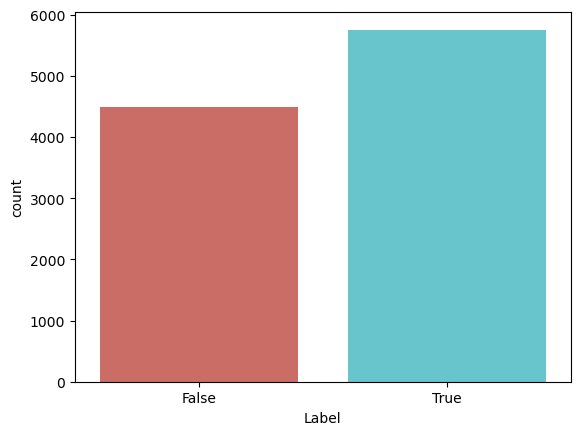

In [101]:
def create_distribution(dataFile):
    return sb.countplot(x='Label', data=dataFile, palette='hls')

# by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(df)

In [91]:
def data_qualityCheck():
    print("Checking data qualitites...")
    df.isnull().sum()
    df.info()  
    print("check finished.")
data_qualityCheck()

df = df.dropna()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished.


In [92]:
print(df.columns)
df.shape
print(df.columns)

Index(['Statement', 'Label'], dtype='object')
Index(['Statement', 'Label'], dtype='object')


In [93]:
print(df.columns)
df.reset_index(drop= True,inplace=True)
df.head(10)

Index(['Statement', 'Label'], dtype='object')


,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True
5,The Chicago Bears have had more starting quart...,True
6,Jim Dunnam has not lived in the district he re...,False
7,I'm the only person on this stage who has work...,True
8,"However, it took $19.5 million in Oregon Lotte...",True
9,Says GOP primary opponents Glenn Grothman and ...,True


In [94]:
Label_train = df.Label


In [95]:
Label_train.head(10)


0    False
1     True
2     True
3    False
4     True
5     True
6    False
7     True
8     True
9     True
Name: Label, dtype: bool

In [96]:
df.drop('Label', axis=1, inplace=True)

In [97]:
df.head(10)

,Statement
0,Says the Annies List political group supports ...
1,When did the decline of coal start? It started...
2,"Hillary Clinton agrees with John McCain ""by vo..."
3,Health care reform legislation is likely to ma...
4,The economic turnaround started at the end of ...
5,The Chicago Bears have had more starting quart...
6,Jim Dunnam has not lived in the district he re...
7,I'm the only person on this stage who has work...
8,"However, it took $19.5 million in Oregon Lotte..."
9,Says GOP primary opponents Glenn Grothman and ...


In [98]:
df['Statement'][2188]

'Says 94 percent of Wisconsin employers think the state is heading in the right direction and a majority say they will grow their companies in 2012.'

In [102]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [103]:
stpwrds

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [118]:
print(df.columns)

Index(['Statement', 'Label'], dtype='object')


In [119]:
for x in range(len(df)) :
    corpus = []
    review = df['Statement'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    df.loc[x,'Statement'] = review

In [120]:
df['Statement'][2188]

'say percent wisconsin employer think state heading right direction majority say grow company'

In [234]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['Statement'], Label_train, test_size=0.3, random_state=42)

In [235]:
X_train.shape, y_train.shape

((7168,), (7168,))

In [236]:
X_train

4919    wall street megabanks received bailouts get ta...
1332                                weve got revenue ever
8207                         north dakota economy reeling
3485    bill obriens tea party legislature tried repea...
3688    say connie mack penny plan would cut billion m...
                              ...                        
5734    took office deficit nearly percent economy tod...
5191                              mosque near ground zero
5390    louie gohmert texas blamed mass shooting movie...
860     governor consult member party released transpo...
7270    telecom bill could keep state corporation comm...
Name: Statement, Length: 7168, dtype: object

In [237]:
y_train

4919     True
1332    False
8207    False
3485    False
3688     True
        ...  
5734     True
5191     True
5390    False
860     False
7270    False
Name: Label, Length: 7168, dtype: bool

In [238]:
X_test

3842     polling show nearly percent national rifle ass...
6480                                left city million bank
4521     say couldnt take stimulus money required unive...
4026     united state industrialized country guarantee ...
10111    health care education reconciliation act large...
                               ...                        
104      nato opening major terror division im sure im ...
3660     three week half million floridian going lose c...
1656     say texas state board education considering el...
1533     say king street patriot held fundraiser featur...
2986     ceo goldman sachs let employee know hed fine e...
Name: Statement, Length: 3072, dtype: object

In [239]:
# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000)
vec_X_train = vectorizer.fit_transform(X_train)
vec_X_test = vectorizer.transform(X_test)

In [240]:
vec_X_train.shape, vec_X_test.shape

((7168, 5000), (3072, 5000))

In [241]:
import itertools

import numpy as np


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

In [242]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Train Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(), #max_iter=1000
    "Random Forest": RandomForestClassifier(), #n_estimators=100
    "SVM": SVC(),
    "SVM2" : SVC(probability=True, kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "PasiveAggressive" : PassiveAggressiveClassifier()
}

Naive Bayes Accuracy: 60.06%
Confusion matrix, without normalization


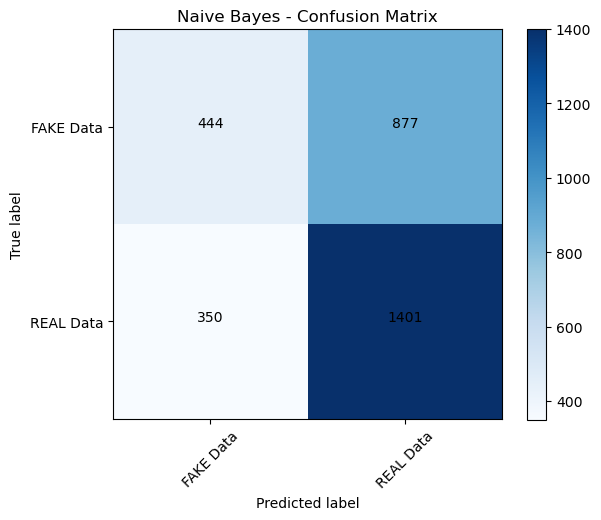

Logistic Regression Accuracy: 60.77%
Confusion matrix, without normalization


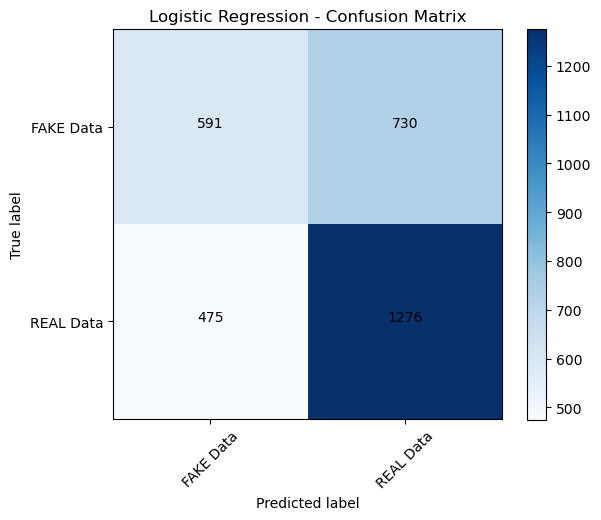

Random Forest Accuracy: 60.51%
Confusion matrix, without normalization


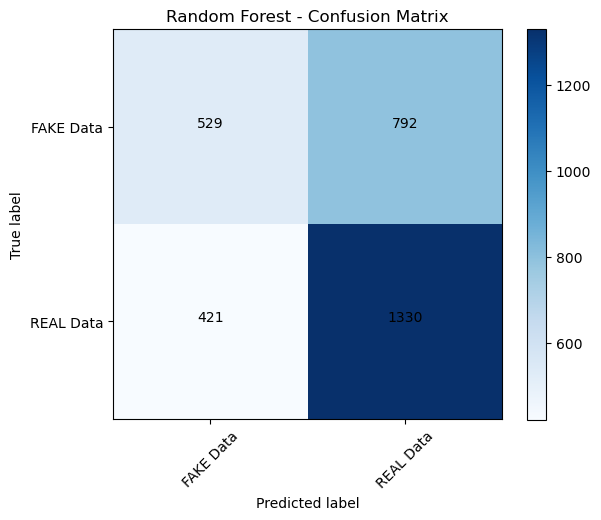

SVM Accuracy: 60.64%
Confusion matrix, without normalization


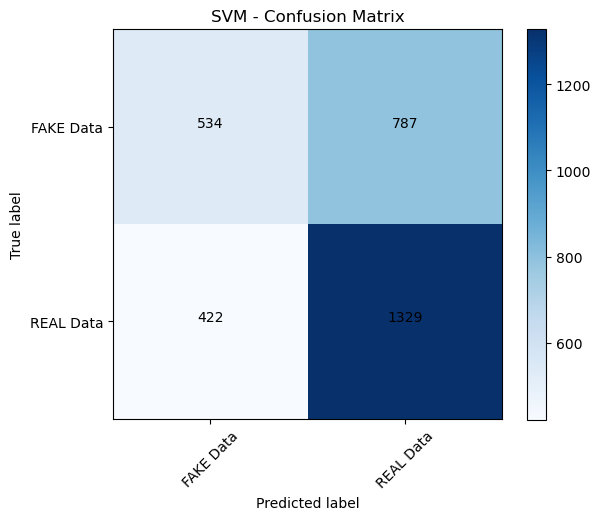

SVM2 Accuracy: 60.64%
Confusion matrix, without normalization


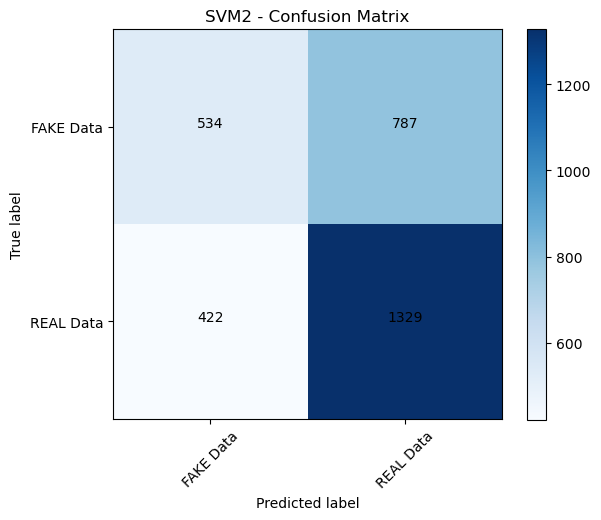

Decision Tree Accuracy: 54.2%
Confusion matrix, without normalization


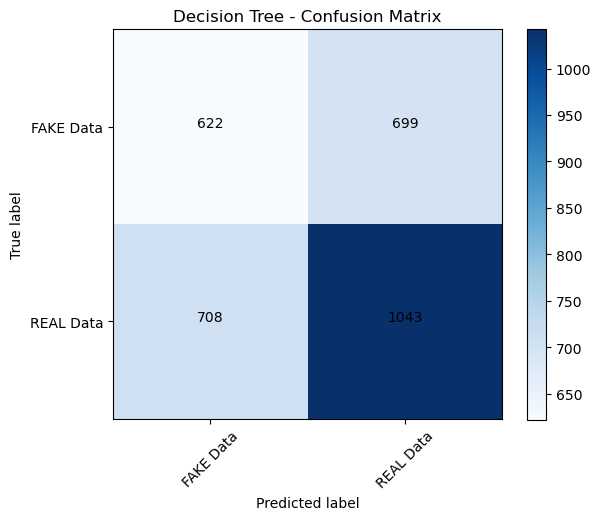

PasiveAggressive Accuracy: 55.18%
Confusion matrix, without normalization


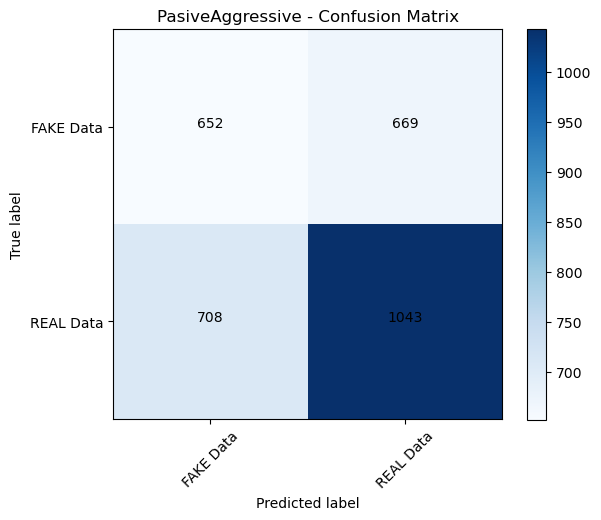

In [243]:
import numpy as np
from sklearn import metrics

accuracies = {}
for name, model in models.items():
    model.fit(vec_X_train, y_train)
    y_pred = model.predict(vec_X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'{name} Accuracy: {round(acc*100,2)}%')
    cm = metrics.confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'], title=f'{name} - Confusion Matrix')
    
    # # Save model
    # with open(f"../models/{name.replace(' ', '_').lower()}.pkl", "wb") as f:
    #     pickle.dump(model, f)

In [217]:

classifier = PassiveAggressiveClassifier()
classifier.fit(vec_X_train,y_train)

PassiveAggressiveClassifier()

Accuracy: 51.95%
Confusion matrix, without normalization


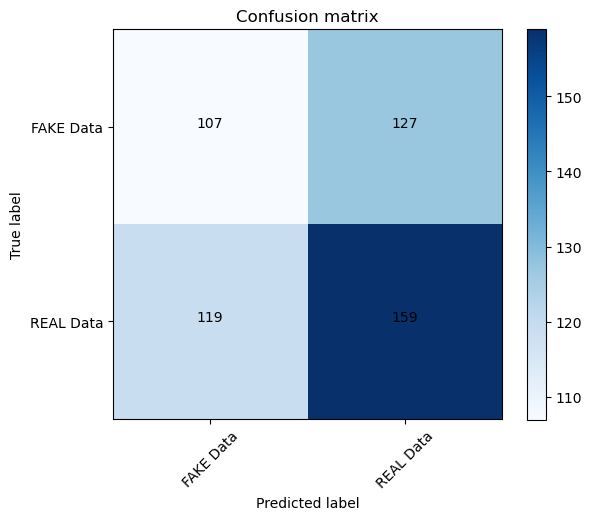

In [218]:

Y_pred = classifier.predict(vec_X_test)
score = metrics.accuracy_score(y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

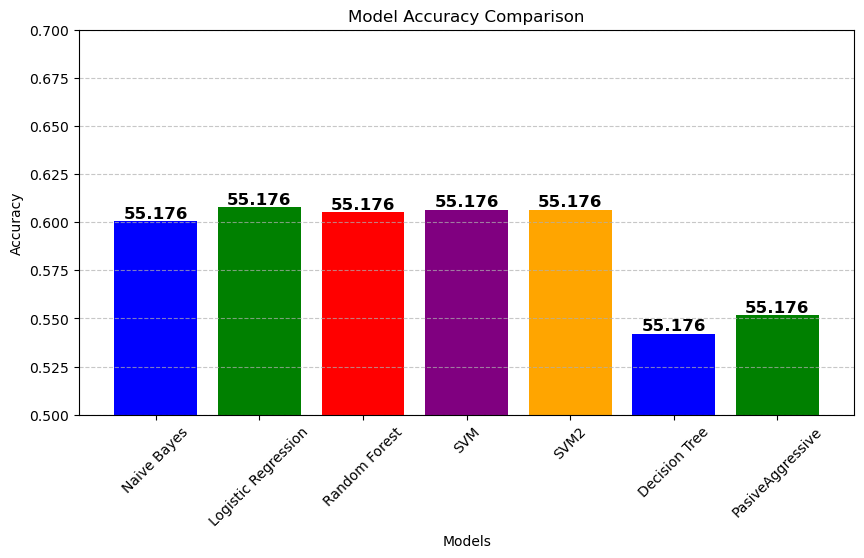

In [249]:



        
# Plot improved accuracy comparison graph
plt.figure(figsize=(10,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{round(acc*100,3)}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0.5, 0.7)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
